                                                
This project aims to predict electricity consumption using different factors such as temperature, number of people, appliances, and other conditions.

used data analysis and machine learning to understand patterns in electricity usage and then build an interactive tool where users can enter values and get a predicted electricity consumption result.

Data Loading – Bringing data into the system

first load the electricity consumption dataset into the program.

Using data.head(), we look at the first few rows of the data to understand:

What columns are present

What kind of values each column contains

This gives us a basic idea of the dataset structure.

In [ ]:
from google.colab import files
files.upload()

import pandas as pd

data = pd.read_csv("electricity_consumption.csv")
data.head()


Saving electricity_consumption.csv to electricity_consumption (1).csv


,temperature_c,occupancy_percent,appliance_count,building_type,building_age_years,insulation_rating,window_type,heating_system,cooling_system,lighting_type,occupant_count,work_hours,holiday_flag,weather_condition,consumption_kwh
0,-1.546017,53.448355,19.0,Industrial,28.842679,Poor,Single Pane,Electric,Window Units,Incandescent,10.0,4.461863,0.0,Cloudy,86.319786
1,21.019071,38.021518,12.0,Residential,NaN,Poor,Double Pane,Heat Pump,NaN,LED,1.0,3.614838,0.0,Rainy,213.599647
2,35.247911,67.547082,22.0,Commercial,66.989041,Average,Double Pane,Gas,NaN,Incandescent,5.0,23.357034,0.0,Cloudy,48.994329
3,NaN,72.818305,22.0,Industrial,23.958960,Excellent,Double Pane,Oil,NaN,NaN,NaN,21.114594,1.0,Rainy,413.141864
4,-3.505855,NaN,27.0,Residential,38.549111,Poor,Double Pane,Gas,Window Units,LED,17.0,6.686622,0.0,Rainy,201.789662




Understanding the Data – Knowing what we are working with

data.info():

It helps us understand the structure of the data and check if any data is missing.

data.describe():

It helps us understand the numerical values in the dataset like average, min, and max.

In [ ]:
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature_c       945 non-null    float64
 1   occupancy_percent   959 non-null    float64
 2   appliance_count     955 non-null    float64
 3   building_type       951 non-null    object 
 4   building_age_years  946 non-null    float64
 5   insulation_rating   948 non-null    object 
 6   window_type         942 non-null    object 
 7   heating_system      941 non-null    object 
 8   cooling_system      623 non-null    object 
 9   lighting_type       964 non-null    object 
 10  occupant_count      954 non-null    float64
 11  work_hours          963 non-null    float64
 12  holiday_flag        945 non-null    float64
 13  weather_condition   942 non-null    object 
 14  consumption_kwh     966 non-null    float64
dtypes: float64(8), object(7)
memory usage: 117.3+ KB


,temperature_c,occupancy_percent,appliance_count,building_age_years,occupant_count,work_hours,holiday_flag,consumption_kwh
count,945.000000,959.000000,955.000000,946.000000,954.000000,963.000000,945.000000,966.000000
mean,15.046731,48.833785,17.047120,50.496983,10.110063,12.092201,0.184127,263.757092
std,14.774326,28.976163,7.130476,28.833881,5.602750,7.128337,0.387793,137.160576
min,-9.987050,0.116928,5.000000,0.225634,1.000000,0.006544,0.000000,11.656815
25%,2.474606,24.498209,11.000000,25.791430,5.000000,5.885497,0.000000,153.025188
50%,14.832047,48.144361,17.000000,49.812600,10.000000,11.951183,0.000000,267.092786
75%,27.808616,73.237444,23.000000,75.743686,15.000000,18.759377,0.000000,383.649880
max,39.981859,99.927008,29.000000,99.943391,19.000000,23.980948,1.000000,499.562389


Handling Missing Data – Cleaning the dataset

It cleans the data by replacing missing numbers with average values so the dataset becomes complete.

It checks and confirms whether any missing data is still left.

In [ ]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.isnull().sum()


,0
temperature_c,0
occupancy_percent,0
appliance_count,0
building_type,49
building_age_years,0
insulation_rating,52
window_type,58
heating_system,59
cooling_system,377
lighting_type,36


Data visualization (understanding patterns)

We use graphs to understand the data better:

Histogram → Shows how electricity consumption values are distributed

Scatter plot → Shows the relationship between temperature and electricity usage

Heatmap → Shows how all numerical variables are related to each other

Shows how electricity consumption values are spread

Each dot = one data point

Shows how strongly variables are related to each other

Values close to 1 → strong positive relationship

Values close to -1 → strong negative relationship

Values near 0 → little or no relationship

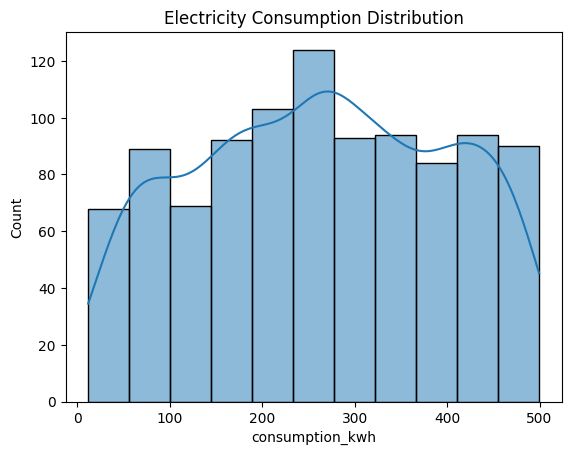

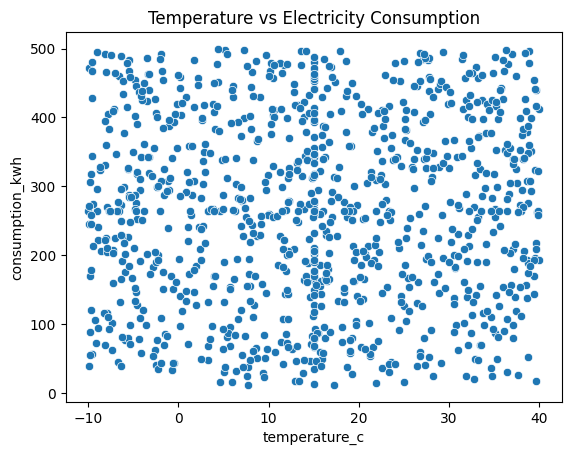

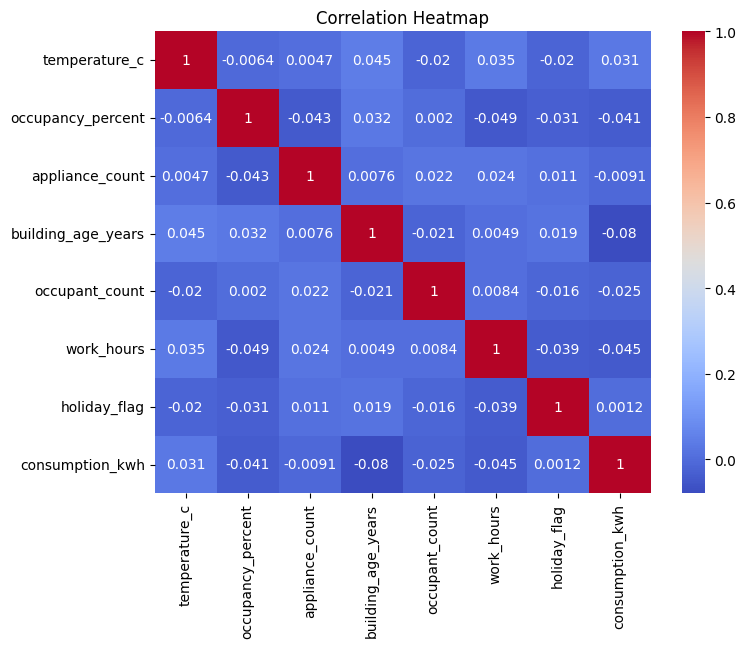

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution
sns.histplot(data['consumption_kwh'], kde=True)
plt.title("Electricity Consumption Distribution")
plt.show()

# Temperature vs Consumption
sns.scatterplot(x='temperature_c', y='consumption_kwh', data=data)
plt.title("Temperature vs Electricity Consumption")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Selecting inputs and output

Inputs (X) → temperature, occupancy, appliance count, etc.

Output (y) → electricity consumption

This helps the model understand what values to use for prediction and what value to predict.

In [ ]:
X = data[['temperature_c', 'occupancy_percent', 'appliance_count']]
y = data['consumption_kwh']


Splitting the data

Splits data into:

80% training data → to teach the model

20% testing data → to check accuracy

The dataset is split into training and testing sets to train the model and evaluate its accuracy.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training the Linear Regression model

We use a Linear Regression model.

A Linear Regression model is created and trained using the training dataset to learn the relationship between inputs and electricity consumption.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Testing the model

We test the model using:

Mean Squared Error (MSE) → how far predictions are from real values

R² Score → how well the model explains electricity consumption

We test the model by comparing predicted values with actual values and measure its performance using error and accuracy scores.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 18584.130786295686
R² Score: -0.01758334331063449


Comparing actual vs predicted values

creates a table that compares the real electricity consumption values with the model’s predicted values so we can see how accurate the model is

In [ ]:
comparison = pd.DataFrame({
    "Actual Consumption": y_test.values,
    "Predicted Consumption": y_pred
})
comparison.head()


,Actual Consumption,Predicted Consumption
0,443.625745,266.821313
1,266.106548,257.789929
2,173.743689,284.416641
3,396.374199,262.795112
4,423.392777,250.137707


Making a sample prediction

give:

Temperature = 30°C

Occupancy = 75%

Appliances = 10

The model predicts:

Estimated electricity consumption in kWh

In [ ]:
sample_input = [[30, 75, 10]]  # temperature, occupancy %, appliance count
sample_prediction = model.predict(sample_input)

print("Predicted Electricity Consumption (kWh):", sample_prediction[0])


Predicted Electricity Consumption (kWh): 261.8559278317588


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

y_test = np.array(y_test, dtype=float)
y_pred = np.array(y_pred, dtype=float)

tolerance = 0.10

correct = np.abs(y_test - y_pred) <= (tolerance * y_test)
accuracy = np.mean(correct)

print(f"{accuracy:.6f}")


0.170000


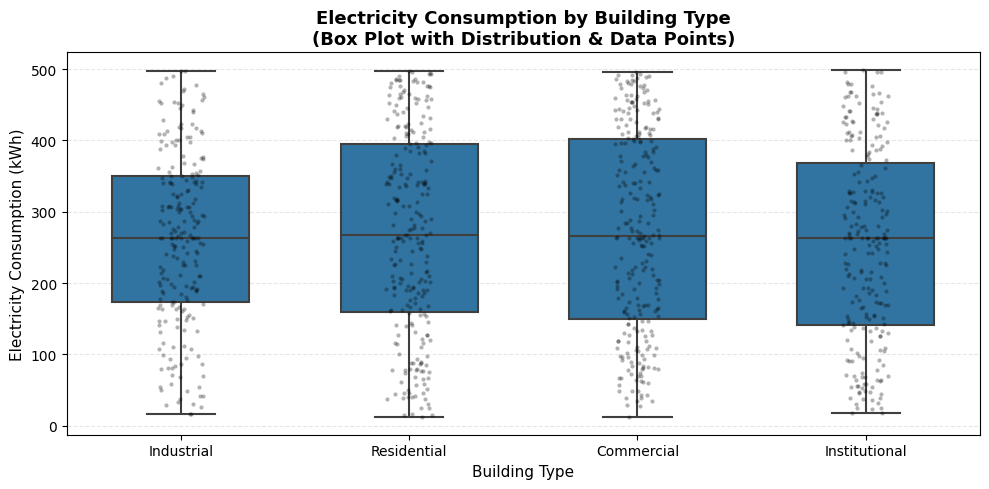

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Boxplot
sns.boxplot(
    x="building_type",
    y="consumption_kwh",
    data=data,
    width=0.6,
    fliersize=4,
    linewidth=1.5
)

# Overlay real data points
sns.stripplot(
    x="building_type",
    y="consumption_kwh",
    data=data,
    color="black",
    alpha=0.3,
    jitter=True,
    size=3
)

plt.xlabel("Building Type", fontsize=11)
plt.ylabel("Electricity Consumption (kWh)", fontsize=11)
plt.title(
    "Electricity Consumption by Building Type\n(Box Plot with Distribution & Data Points)",
    fontsize=13,
    fontweight="bold"
)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

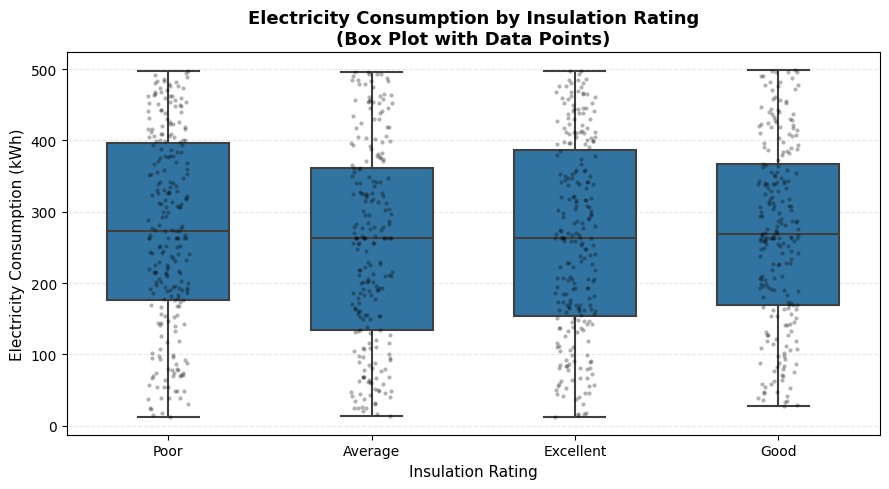

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))

# Box plot
sns.boxplot(
    x="insulation_rating",
    y="consumption_kwh",
    data=data,
    width=0.6,
    fliersize=4,
    linewidth=1.5
)

# Overlay real data points
sns.stripplot(
    x="insulation_rating",
    y="consumption_kwh",
    data=data,
    color="black",
    alpha=0.3,
    jitter=True,
    size=3
)

plt.xlabel("Insulation Rating", fontsize=11)
plt.ylabel("Electricity Consumption (kWh)", fontsize=11)
plt.title(
    "Electricity Consumption by Insulation Rating\n(Box Plot with Data Points)",
    fontsize=13,
    fontweight="bold"
)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

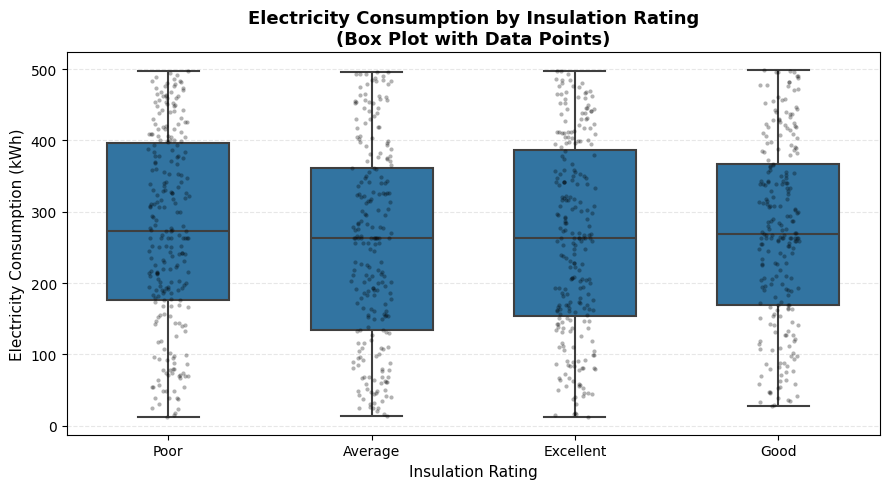

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))

sns.boxplot(
    x="insulation_rating",
    y="consumption_kwh",
    data=data,
    width=0.6,
    fliersize=4,
    linewidth=1.5
)

sns.stripplot(
    x="insulation_rating",
    y="consumption_kwh",
    data=data,
    color="black",
    alpha=0.3,
    jitter=True,
    size=3
)

plt.xlabel("Insulation Rating", fontsize=11)
plt.ylabel("Electricity Consumption (kWh)", fontsize=11)
plt.title("Electricity Consumption by Insulation Rating\n(Box Plot with Data Points)", fontsize=13, fontweight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

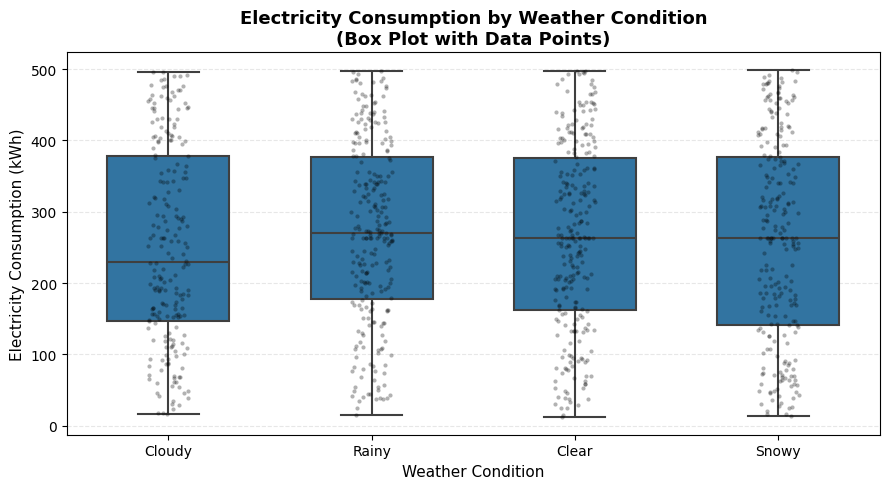

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))

sns.boxplot(
    x="weather_condition",
    y="consumption_kwh",
    data=data,
    width=0.6,
    fliersize=4,
    linewidth=1.5
)

sns.stripplot(
    x="weather_condition",
    y="consumption_kwh",
    data=data,
    color="black",
    alpha=0.3,
    jitter=True,
    size=3
)

plt.xlabel("Weather Condition", fontsize=11)
plt.ylabel("Electricity Consumption (kWh)", fontsize=11)
plt.title("Electricity Consumption by Weather Condition\n(Box Plot with Data Points)", fontsize=13, fontweight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
pip install gradio

Building the Interactive Web App (Gradio)

This dashboard is a web-based tool that helps predict and understand electricity consumption using AI.

The user enters 3 values using sliders:

1️. Temperature (°C)

→ How hot or cold the environment is

2️. Occupancy Percentage

→ How many people are present in the building

3️. Appliance Count

→ Number of electrical appliances being used

These are the main factors that affect electricity usage.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import gradio as gr

# ---------------------------
# Load Data
# ---------------------------
data = pd.read_csv("electricity_consumption.csv")

# Fill missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

# ---------------------------
# Features & Target
# ---------------------------
X = data[['temperature_c', 'occupancy_percent', 'appliance_count']]
y = data['consumption_kwh']

# ---------------------------
# Train Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Model Training
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# AI SYSTEM FUNCTIONS
# ---------------------------

def classify_consumption(kwh):
    if kwh < 100:
        return "Low Consumption"
    elif kwh < 250:
        return "Medium Consumption"
    elif kwh < 400:
        return "High Consumption"
    else:
        return "Extreme Consumption"

def detect_anomaly(temp, occ, app, kwh):
    if occ < 20 and kwh > 300:
        return "⚠️ Anomaly: High usage with low occupancy"
    if app < 5 and kwh > 250:
        return "⚠️ Anomaly: High usage with low appliances"
    return "Normal Usage Pattern"

def co2_emission(kwh):
    # Approx: 0.82 kg CO2 per kWh (India avg)
    return round(kwh * 0.82, 2)

def optimization_advice(temp, occ, app, kwh):
    tips = []
    if app > 15:
        tips.append("Reduce appliance usage")
    if temp > 30:
        tips.append("Use insulation & energy-efficient cooling")
    if occ < 30 and kwh > 200:
        tips.append("Avoid unnecessary power usage")
    if not tips:
        tips.append("Energy usage is optimized")
    return ", ".join(tips)

def ai_recommendation(temp, occ, app, kwh):
    if kwh > 350:
        return "High energy risk zone – immediate optimization required"
    elif kwh > 200:
        return "Moderate risk – efficiency improvement recommended"
    else:
        return "Energy usage is under control"

# ---------------------------
# Prediction Function
# ---------------------------
def smart_energy_system(temperature, occupancy, appliances):

    input_data = [[temperature, occupancy, appliances]]
    pred = model.predict(input_data)[0]

    classification = classify_consumption(pred)
    anomaly = detect_anomaly(temperature, occupancy, appliances, pred)
    co2 = co2_emission(pred)
    optimization = optimization_advice(temperature, occupancy, appliances, pred)
    recommendation = ai_recommendation(temperature, occupancy, appliances, pred)

    return (
        round(pred, 2),
        classification,
        anomaly,
        f"{co2} kg CO₂",
        optimization,
        recommendation
    )

# ---------------------------
# Gradio Dashboard
# ---------------------------
iface = gr.Interface(
    fn=smart_energy_system,
    inputs=[
        gr.Slider(-10, 50, value=25, label="Temperature (°C)"),
        gr.Slider(0, 100, value=50, label="Occupancy Percentage"),
        gr.Slider(1, 30, value=10, label="Appliance Count")
    ],
    outputs=[
        gr.Textbox(label="Predicted Consumption (kWh)"),
        gr.Textbox(label="Consumption Category"),
        gr.Textbox(label="Anomaly Detection"),
        gr.Textbox(label="Carbon Emission"),
        gr.Textbox(label="Optimization Tips"),
        gr.Textbox(label="AI Recommendation")
    ],
    title="⚡ Smart AI Energy Prediction System",
    description="AI-powered system for energy prediction, optimization, carbon impact & smart recommendations"
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ddccf5e171a7d7e90b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



These are the main factors that affect electricity usage.

When the user clicks submit:

Step 1: Prediction

The AI model predicts:

How much electricity will be consumed (in kWh)

Step 2: Consumption Category

It classifies the result into:

Low consumption

Medium consumption

High consumption

Extreme consumption

This makes the result easy to understand.

Step 3: Anomaly Detection

The system checks for abnormal usage, like:

High electricity use with very low people

High use with very few appliances

This helps detect wastage or inefficiency.

Step 4: Carbon Emission Calculation

It converts electricity usage into:

CO₂ emission value

This shows the environmental impact of the energy usage.

Step 5: Energy Optimization Tips

The system gives simple energy-saving suggestions, like:

Reduce appliance usage

Improve insulation

Avoid unnecessary power usage

Step 6: AI Recommendation

Finally, the system gives a smart decision message, such as:

“Energy usage is under control”

“Efficiency improvement recommended”

“Immediate optimization required”